In [400]:
import algorithm as al
import numpy as np
import pandas as pd

In [401]:
# train = pd.read_excel('../archive/Raisin_Dataset.xlsx')
train = pd.read_csv('../../GR1/Algerian_forest_fires_dataset_UPDATE.csv')
train

Temperature   RH   Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI  Classes  
0             29   57   18    0.0  65.7   3.4   7.6  1.3   3.4  0.5          0
1             29   61   13    1.3  64.4   4.1   7.6  1.0   3.9  0.4          0
2             26   82   22   13.1  47.1   2.5   7.1  0.3   2.7  0.1          0
3             25   89   13    2.5  28.6   1.3   6.9  0.0   1.7  0.0          0
4             27   77   16    0.0  64.8   3.0  14.2  1.2   3.9  0.5          0
..           ...  ...  ...    ...   ...   ...   ...  ...   ...  ...        ...
239           30   65   14    0.0  85.4  16.0  44.5  4.5  16.9  6.5          1
240           28   87   15    4.4  41.1   6.5   8.0  0.1   6.2  0.0          0
241           27   87   29    0.5  45.9   3.5   7.9  0.4   3.4  0.2          0
242           24   54   18    0.1  79.7   4.3  15.2  1.7   5.1  0.7          0
243           24   64   15    0.2  67.3   3.8  16.5  1.2   4.8  0.5          0

[244 rows x 11 columns]

In [402]:
train = train.to_numpy()
R_train = train[:, 0:-1]
R_train
# R_train = np.random.rand(100, 10)

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [403]:
Nd = al.normalization(R_train, 0, 1)
Nd

array([[0.35      , 0.52173913, 0.52173913, ..., 0.06842105, 0.03437967,
        0.01607717],
       [0.35      , 0.57971014, 0.30434783, ..., 0.05263158, 0.04185351,
        0.01286174],
       [0.2       , 0.88405797, 0.69565217, ..., 0.01578947, 0.02391629,
        0.00321543],
       ...,
       [0.25      , 0.95652174, 1.        , ..., 0.02105263, 0.03437967,
        0.00643087],
       [0.1       , 0.47826087, 0.52173913, ..., 0.08947368, 0.05979073,
        0.02250804],
       [0.1       , 0.62318841, 0.39130435, ..., 0.06315789, 0.05530643,
        0.01607717]])

In [404]:
dis = al.distance(Nd)
dis

array([[0.        , 0.2396043 , 0.93351308, ..., 0.7192331 , 0.33190264,
        0.30455123],
       [0.2396043 , 0.        , 0.91096014, ..., 0.84540361, 0.42394814,
        0.28310997],
       [0.93351308, 0.91096014, 0.        , ..., 0.8146118 , 1.02319802,
        0.92511498],
       ...,
       [0.7192331 , 0.84540361, 0.8146118 , ..., 0.        , 0.85960746,
        0.78051196],
       [0.33190264, 0.42394814, 1.02319802, ..., 0.85960746, 0.        ,
        0.26972169],
       [0.30455123, 0.28310997, 0.92511498, ..., 0.78051196, 0.26972169,
        0.        ]])

In [405]:
prod = al.product(dis,Nd)
prod

array([[ 96.17262101,  94.33836447,  71.95260117, ...,  59.08213284,
         57.66820331,  59.42170948],
       [ 95.83376397,  92.69628243,  72.59429977, ...,  59.8749093 ,
         58.00918793,  60.17677225],
       [162.50459409, 162.60212318, 120.64260284, ...,  91.50762489,
         85.61041934,  87.36686631],
       ...,
       [148.76632472, 145.48900488, 108.52832638, ...,  84.69533642,
         79.24663321,  81.30347694],
       [104.88372614, 106.52652058,  79.22826852, ...,  60.82260144,
         59.22428323,  60.38342777],
       [106.28957883, 101.27339549,  78.35971588, ...,  63.77604432,
         61.08015701,  63.28518682]])

In [406]:
M = al.membershipValue(prod)
M

array([[0.01039797, 0.01060014, 0.01389804, ..., 0.01692559, 0.01734058,
        0.01682887],
       [0.01043474, 0.01078792, 0.01377519, ..., 0.01670149, 0.01723865,
        0.01661771],
       [0.00615367, 0.00614998, 0.00828895, ..., 0.01092805, 0.01168082,
        0.01144599],
       ...,
       [0.00672195, 0.00687337, 0.00921418, ..., 0.01180703, 0.01261883,
        0.0122996 ],
       [0.00953437, 0.00938733, 0.01262176, ..., 0.01644126, 0.01688497,
        0.01656084],
       [0.00940826, 0.00987426, 0.01276166, ..., 0.01567987, 0.01637193,
        0.01580149]])

In [407]:
N = al.nonMembershipValue(M, 0.45)
N

array([[0.73735792, 0.73526392, 0.70419541, ..., 0.67962696, 0.67648911,
        0.68036554],
       [0.73697522, 0.73334148, 0.70526257, ..., 0.68134245, 0.67725524,
        0.68198764],
       [0.78894469, 0.78899797, 0.76091303, ..., 0.73192058, 0.72447875,
        0.72676678],
       ...,
       [0.78096403, 0.77890801, 0.75016529, ..., 0.72326118, 0.71562079,
        0.71858679],
       [0.7466039 , 0.74822989, 0.71559384, ..., 0.68335348, 0.67993683,
        0.68242683],
       [0.74799751, 0.74290444, 0.71430931, ..., 0.68935931, 0.68389273,
        0.68838744]])

In [408]:
H = al.hesitancyValue(N, 0.45)
H

array([[0.25224411, 0.25413594, 0.28190655, ..., 0.30344745, 0.30617031,
        0.30280559],
       [0.25259005, 0.2558706 , 0.28096224, ..., 0.30195606, 0.30550611,
        0.30139465],
       [0.20490164, 0.20485205, 0.23079802, ..., 0.25715137, 0.26384043,
        0.26178724],
       ...,
       [0.21231402, 0.21421861, 0.24062053, ..., 0.26493179, 0.27176038,
        0.26911361],
       [0.24386173, 0.24238277, 0.27178441, ..., 0.30020527, 0.30317821,
        0.30101234],
       [0.24259423, 0.2472213 , 0.27292903, ..., 0.29496082, 0.29973534,
        0.29581108]])

In [409]:
M, N, H = al.method2_1(R_train, 0, 1, 0.45, 1)

M = np.around(M, 3)
N = np.around(N, 3)
H = np.around(H, 3)

print ("M = ",M)
print ("\nN = ",N)
print ("\nH = ",H)

M =  [[0.35  0.522 0.522 ... 0.069 0.034 0.016]
 [0.35  0.58  0.304 ... 0.053 0.042 0.013]
 [0.2   0.884 0.696 ... 0.016 0.024 0.003]
 ...
 [0.25  0.956 1.    ... 0.021 0.034 0.006]
 [0.1   0.478 0.522 ... 0.09  0.06  0.023]
 [0.1   0.623 0.391 ... 0.063 0.055 0.016]]

N =  [[0.114 0.047 0.047 ... 0.453 0.576 0.685]
 [0.114 0.034 0.141 ... 0.502 0.543 0.712]
 [0.229 0.002 0.015 ... 0.688 0.632 0.839]
 ...
 [0.182 0.    0.    ... 0.65  0.577 0.784]
 [0.377 0.06  0.047 ... 0.4   0.479 0.64 ]
 [0.377 0.025 0.094 ... 0.469 0.494 0.685]]

H =  [[0.536 0.431 0.431 ... 0.478 0.389 0.299]
 [0.536 0.387 0.554 ... 0.445 0.415 0.275]
 [0.571 0.114 0.289 ... 0.296 0.344 0.157]
 ...
 [0.568 0.043 0.    ... 0.329 0.389 0.209]
 [0.523 0.461 0.431 ... 0.51  0.461 0.337]
 [0.523 0.351 0.515 ... 0.468 0.451 0.299]]


In [410]:
U, S = al.method3_1(R_train, 2, 1.7, 0.45,'distance_function')

Initial centroids:
[[[4.03846359e-01 8.80342160e-02 5.08119425e-01]
  [9.35581107e-01 3.98340264e-04 6.40205531e-02]
  [1.09766547e-01 3.58160221e-01 5.32073232e-01]
  [5.19597465e-01 4.80716459e-02 4.32330889e-01]
  [6.68491950e-01 1.84282932e-02 3.13079756e-01]
  [9.71783246e-01 6.21746968e-05 2.81545792e-02]
  [7.64813328e-01 7.96814506e-03 2.27218527e-01]
  [4.81691098e-01 5.91503165e-02 4.59158586e-01]
  [7.12091031e-02 4.46166493e-01 4.82624404e-01]
  [2.09753943e-01 2.18921975e-01 5.71324082e-01]]

 [[1.17584515e-01 3.43626730e-01 5.38788756e-01]
  [6.78677889e-01 1.70504131e-02 3.04271698e-01]
  [9.53458132e-01 1.91245058e-04 4.63506232e-02]
  [3.75440076e-01 1.01064324e-01 5.23495600e-01]
  [1.60793004e-01 2.76388964e-01 5.62818032e-01]
  [2.78414737e-01 1.59296036e-01 5.62289227e-01]
  [7.57133365e-01 8.60737353e-03 2.34259262e-01]
  [1.02637554e-01 3.72223558e-01 5.25138888e-01]
  [2.48491010e-01 1.82890636e-01 5.68618354e-01]
  [8.26148463e-01 3.89391487e-03 1.69957622e-01]

In [411]:
X = np.dstack((M,N,H))
P = X.shape[0]
y = np.empty(P, dtype = object)
for i in range(P):
    if al.distance_function(X[i], S[0]) < al.distance_function(X[i], S[1]): y[i] = 1
    else: y[i] = 0

print(np.sum(y == train[:,-1])/P)

0.9139344262295082


In [412]:
from sklearn.decomposition import PCA

In [413]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(M))
centroids = pd.DataFrame(pca.fit_transform(S[:,:,0]))

In [414]:
import matplotlib.pyplot as plt

In [415]:
label = train[:,-1]

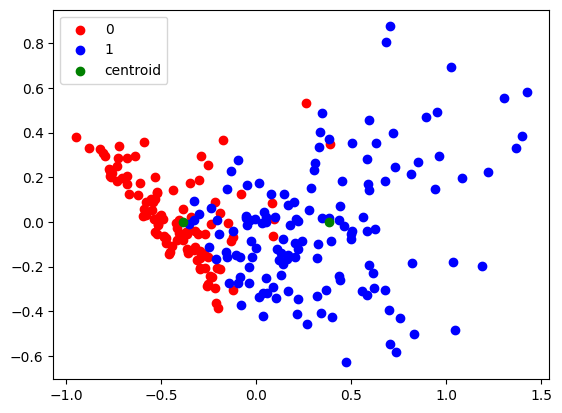

In [416]:
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [417]:
test1 = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

In [418]:
test2 = S.reshape(S.shape[0], S.shape[1]*S.shape[2])

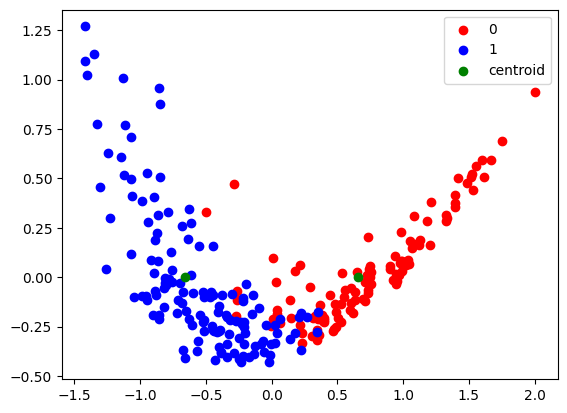

In [419]:
pca = PCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(test1))
centroids = pd.DataFrame(pca.fit_transform(test2))
plt.scatter(transformed[label==0][0], transformed[label==0][1], label=0, c='red')
plt.scatter(transformed[label==1][0], transformed[label==1][1], label=1, c='blue')
plt.scatter(centroids[0], centroids[1], label='centroid', c='green')
plt.legend()
plt.show()

In [420]:
true_labels = train[:, -1]
CA = al.calculate_CA(true_labels, y)
PC = al.calculate_PC(U)
# SC = al.calculate_SC(R_train, U, S)
# XB = al.calculate_XB(R_train, U, S) 
# DI = al.calculate_DI(R_train, U, S)  

# Print the evaluation metrics
print(f'Clustering Accuracy (CA): {CA}')
print(f'Partition Coefficient (PC): {PC}')
# print(f'Partition Index (SC): {SC}')
# print(f'Xie-Beni Index (XB): {XB}')
# print(f'Dunn Index (DI): {DI}')

Clustering Accuracy (CA): 0.9139344262295082
Partition Coefficient (PC): 0.8019894570967898
